In [ ]:
# import packages
import numpy as np
import tensorflow as tf
import keras
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.models import Sequential
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
from keras.utils.vis_utils import plot_model
from tensorflow.keras.optimizers import Adam

In [ ]:
# load mnist digits dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [ ]:
# normalise the data
x_train  = x_train / 255
x_test = x_test / 255

In [ ]:
# reshape the image data
x_train_rs = x_train.reshape(x_train.shape[0], 784)
x_test_rs = x_test.reshape(x_test.shape[0], 784)

In [ ]:
# one hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

#Fully Connected Layers

In [ ]:
# design the fully connected network
model = Sequential()

model.add(Dense(units=256, input_shape=(784,), activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

In [ ]:
optimizer=Adam(learning_rate=.0001)

In [ ]:
# compile model
model.compile(optimizer=optimizer,
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
early_stopping_monitor = EarlyStopping(patience=3, restore_best_weights=True)

In [ ]:
# fit training data
training = model.fit(x_train_rs, y_train, validation_split=0.2, epochs=75, batch_size = 512,  callbacks=[early_stopping_monitor])

Epoch 1/75
94/94 [==============================] - 3s 21ms/step - loss: 1.8190 - accuracy: 0.4426 - val_loss: 1.1357 - val_accuracy: 0.7261
Epoch 2/75
94/94 [==============================] - 2s 19ms/step - loss: 0.7396 - accuracy: 0.8219 - val_loss: 0.4575 - val_accuracy: 0.8898
Epoch 3/75
94/94 [==============================] - 2s 18ms/step - loss: 0.4035 - accuracy: 0.8936 - val_loss: 0.3182 - val_accuracy: 0.9168
Epoch 4/75
94/94 [==============================] - 2s 18ms/step - loss: 0.3104 - accuracy: 0.9152 - val_loss: 0.2657 - val_accuracy: 0.9273
Epoch 5/75
94/94 [==============================] - 2s 19ms/step - loss: 0.2651 - accuracy: 0.9266 - val_loss: 0.2353 - val_accuracy: 0.9370
Epoch 6/75
94/94 [==============================] - 2s 18ms/step - loss: 0.2338 - accuracy: 0.9342 - val_loss: 0.2162 - val_accuracy: 0.9404
Epoch 7/75
94/94 [==============================] - 2s 18ms/step - loss: 0.2110 - accuracy: 0.9406 - val_loss: 0.1974 - val_accuracy: 0.9457
Epoch 8/75
94

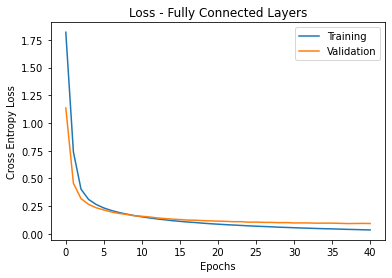

In [ ]:
# Extract the history from the training object
history = training.history

# Plot the training loss 
plt.plot(history['loss'], label='Training')
# Plot the validation loss
plt.plot(history['val_loss'], label = 'Validation')

plt.title('Loss - Fully Connected Layers')
plt.xlabel('Epochs')
plt.ylabel('Cross Entropy Loss')

# Show the figure
plt.legend()
plt.show()

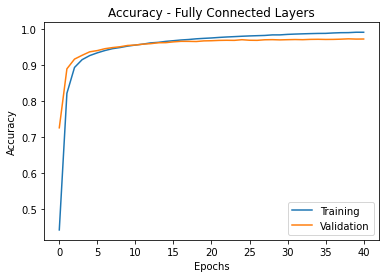

In [ ]:
# Extract the history from the training object
history = training.history

# Plot the training accuracy 
plt.plot(history['accuracy'], label='Training')
# Plot the validation accuracy
plt.plot(history['val_accuracy'], label = 'Validation')

plt.title('Accuracy - Fully Connected Layers')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Show the figure
plt.legend()
plt.show()

In [ ]:
# evaluate model
model.evaluate(x_test_rs, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0848 - accuracy: 0.9727


[0.08483586460351944, 0.9726999998092651]

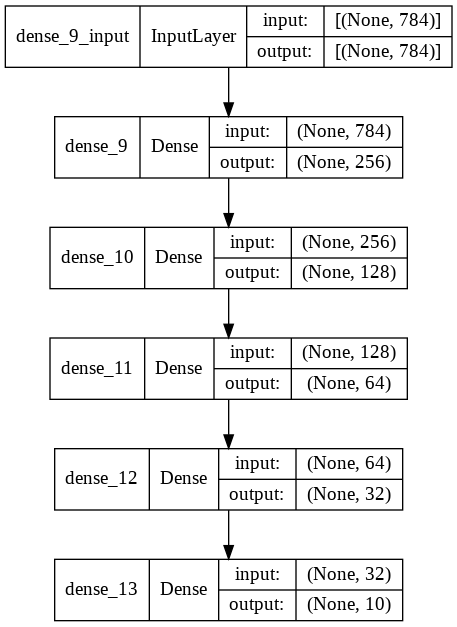

In [ ]:
plot_model(model, show_shapes=True, show_layer_names=True)

#Convolutional Neural Network

In [ ]:
model2 = Sequential()
model2.add(Conv2D(32, (3,3), input_shape=(28,28,1), activation='relu'))
model2.add(MaxPool2D(pool_size=(2,2)))
model2.add(Conv2D(32, (3,3), activation='relu'))
model2.add(Conv2D(32, (3,3), activation='relu'))
model2.add(Flatten())
model2.add(Dense(32, activation='relu'))
model2.add(Dense(10, activation='softmax'))

In [ ]:
model2.compile(optimizer=optimizer,
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# fit training data
training2 = model2.fit(x_train, y_train, validation_split=0.2, epochs=75, batch_size=128, callbacks=[early_stopping_monitor])

Epoch 1/75
375/375 [==============================] - 39s 103ms/step - loss: 0.3901 - accuracy: 0.8837 - val_loss: 0.1598 - val_accuracy: 0.9548
Epoch 2/75
375/375 [==============================] - 40s 107ms/step - loss: 0.1317 - accuracy: 0.9608 - val_loss: 0.1056 - val_accuracy: 0.9707
Epoch 3/75
375/375 [==============================] - 39s 105ms/step - loss: 0.0949 - accuracy: 0.9721 - val_loss: 0.0881 - val_accuracy: 0.9753
Epoch 4/75
375/375 [==============================] - 39s 103ms/step - loss: 0.0786 - accuracy: 0.9775 - val_loss: 0.0788 - val_accuracy: 0.9768
Epoch 5/75
375/375 [==============================] - 39s 103ms/step - loss: 0.0691 - accuracy: 0.9803 - val_loss: 0.0708 - val_accuracy: 0.9800
Epoch 6/75
375/375 [==============================] - 39s 104ms/step - loss: 0.0619 - accuracy: 0.9818 - val_loss: 0.0692 - val_accuracy: 0.9795
Epoch 7/75
375/375 [==============================] - 39s 104ms/step - loss: 0.0565 - accuracy: 0.9839 - val_loss: 0.0654 - val_ac

In [ ]:
# evaluate model
model2.evaluate(x_test, y_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.0369 - accuracy: 0.9880


[0.036930110305547714, 0.9879999756813049]

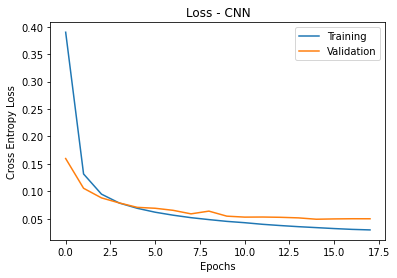

In [ ]:
# Extract the history from the training object
history2 = training2.history

# Plot the training loss 
plt.plot(history2['loss'], label='Training')
# Plot the validation loss
plt.plot(history2['val_loss'], label = 'Validation')

plt.title('Loss - CNN')
plt.xlabel('Epochs')
plt.ylabel('Cross Entropy Loss')

# Show the figure
plt.legend()
plt.show()

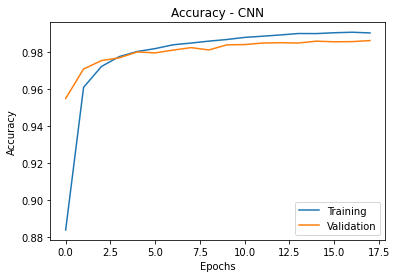

In [ ]:
# Extract the history from the training object
history2 = training2.history

# Plot the training accuracy 
plt.plot(history2['accuracy'], label='Training')
# Plot the validation accuracy
plt.plot(history2['val_accuracy'], label = 'Validation')

plt.title('Accuracy - CNN')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Show the figure
plt.legend()
plt.show()

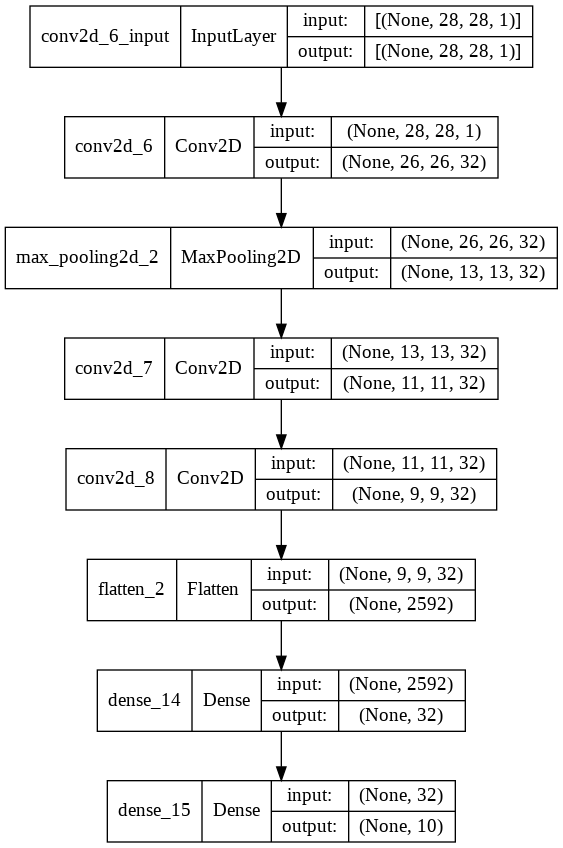

In [ ]:
plot_model(model2, show_shapes=True, show_layer_names=True)